In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

np.random.seed(42)

BASE_DIR = Path(".")
DATA_DIR = BASE_DIR / "data"
DATA_DIR.mkdir(parents=True, exist_ok=True)

N_ROWS = 15000

In [2]:
dates = pd.date_range(start="2022-01-01", end="2024-12-31", freq="D")
regions = ["North", "South", "East", "West"]
categories = ["Electronics", "Clothing", "Home Appliances", "Groceries", "Sports"]
products = {
    "Electronics": ["Laptop", "Smartphone", "Tablet", "Headphones", "Camera"],
    "Clothing": ["T-Shirt", "Jeans", "Jacket", "Shoes", "Dress"],
    "Home Appliances": ["Microwave", "Refrigerator", "Washing Machine", "Blender", "Air Conditioner"],
    "Groceries": ["Rice", "Wheat", "Milk", "Eggs", "Vegetables"],
    "Sports": ["Football", "Cricket Bat", "Tennis Racket", "Basketball", "Gym Equipment"]
}

price_map = {
    "Electronics": (150, 1500),
    "Clothing": (10, 150),
    "Home Appliances": (50, 1200),
    "Groceries": (1, 20),
    "Sports": (15, 600)
}

records = []
for i in range(1, N_ROWS + 1):
    category = np.random.choice(categories)
    product = np.random.choice(products[category])
    q = np.random.randint(1, 8)
    p_low, p_high = price_map[category]
    price = np.round(np.random.uniform(p_low, p_high), 2)
    date = np.random.choice(dates)
    region = np.random.choice(regions)
    customer_id = f"CUST{np.random.randint(1000, 9999)}"
    records.append([i, date, customer_id, region, product, category, q, price])

df = pd.DataFrame(records, columns=[
    "OrderID","Date","CustomerID","Region","Product","Category","Quantity","Price"
])
df["Revenue"] = df["Quantity"] * df["Price"]
df.head()

,OrderID,Date,CustomerID,Region,Product,Category,Quantity,Price,Revenue
0,1,2024-11-10,CUST7265,East,Vegetables,Groceries,7,14.91,104.37
1,2,2024-05-21,CUST9322,West,Washing Machine,Home Appliances,3,1046.10,3138.30
2,3,2023-01-21,CUST6051,West,Cricket Bat,Sports,4,564.05,2256.20
3,4,2022-09-10,CUST9666,West,Football,Sports,4,372.82,1491.28
4,5,2022-07-09,CUST3734,South,Refrigerator,Home Appliances,4,1169.82,4679.28


In [3]:
# Ensure dtypes
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["MonthName"] = df["Date"].dt.strftime("%b")
df["YearMonth"] = df["Date"].dt.to_period("M").astype(str)

raw_path = DATA_DIR / "sales_raw.csv"
clean_path = DATA_DIR / "sales_clean.csv"
df.to_csv(raw_path, index=False)
df.to_csv(clean_path, index=False)

clean_path

WindowsPath('data/sales_clean.csv')

In [4]:
total_revenue = df["Revenue"].sum()
total_orders = df["OrderID"].nunique()
unique_customers = df["CustomerID"].nunique()
avg_order_value = df.groupby("OrderID")["Revenue"].sum().mean()

kpis = {
    "Total Revenue": float(np.round(total_revenue, 2)),
    "Total Orders": int(total_orders),
    "Unique Customers": int(unique_customers),
    "Average Order Value": float(np.round(avg_order_value, 2))
}
kpis


{'Total Revenue': 22031146.54,
 'Total Orders': 15000,
 'Unique Customers': 7287,
 'Average Order Value': 1468.74}

,Revenue
Category,
Electronics,9931920.07
Home Appliances,7342460.17
Sports,3641753.33
Clothing,984769.17
Groceries,130243.80


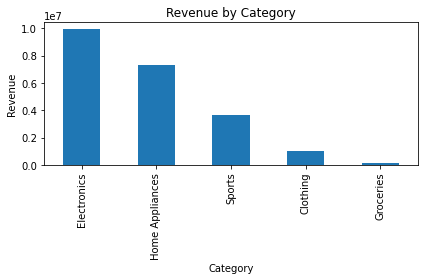

In [5]:

rev_by_cat = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)
display(rev_by_cat.to_frame("Revenue"))

plt.figure()
rev_by_cat.plot(kind="bar", title="Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

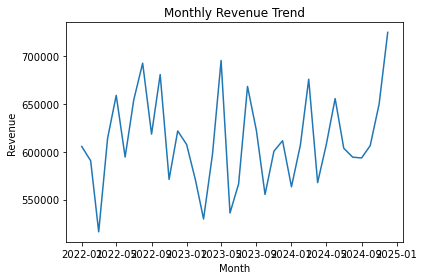

,YearMonth,Revenue
31,2024-08-01,594421.37
32,2024-09-01,593576.00
33,2024-10-01,606419.60
34,2024-11-01,649846.19
35,2024-12-01,724901.31


In [6]:
monthly = df.groupby("YearMonth")["Revenue"].sum().reset_index()
monthly["YearMonth"] = pd.to_datetime(monthly["YearMonth"])

plt.figure()
plt.plot(monthly["YearMonth"], monthly["Revenue"])
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

monthly.tail()


In [7]:
top_products = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False).head(10)
top_customers = df.groupby("CustomerID")["Revenue"].sum().sort_values(ascending=False).head(10)

display(top_products.to_frame("Revenue"))
display(top_customers.to_frame("Revenue"))

,Revenue
Product,
Camera,2167458.20
Tablet,2050421.49
Smartphone,2042998.69
Headphones,1943752.19
Laptop,1727289.50
Refrigerator,1528374.74
Blender,1487443.09
Microwave,1484952.90
Air Conditioner,1445505.07


,Revenue
CustomerID,
CUST1383,24598.30
CUST8996,23285.60
CUST5027,22849.76
CUST6755,21920.62
CUST3172,20426.68
CUST6243,20373.57
CUST5178,19702.58
CUST9964,19097.79
CUST7436,18854.82


In [8]:

region_pivot = pd.pivot_table(
    df, values="Revenue", index="Region", columns="Category", aggfunc="sum", fill_value=0
).round(2)

display(region_pivot)
region_pivot_path = DATA_DIR / "region_pivot.csv"
region_pivot.to_csv(region_pivot_path)
region_pivot_path


Category,Clothing,Electronics,Groceries,Home Appliances,Sports
Region,,,,,
East,257770.04,2612255.66,31336.61,1835970.76,963760.77
North,233530.43,2642568.04,32031.78,1727249.13,888080.61
South,247596.16,2331527.85,34915.40,1960485.87,908481.69
West,245872.54,2345568.52,31960.01,1818754.41,881430.26


WindowsPath('data/region_pivot.csv')

In [9]:
clean_path = DATA_DIR / "sales_clean.csv"
df.to_csv(clean_path, index=False)

sample_path = DATA_DIR / "sales_sample_1000.csv"
df.sample(1000, random_state=42).to_csv(sample_path, index=False)

str(clean_path), str(sample_path)


('data\\sales_clean.csv', 'data\\sales_sample_1000.csv')